<a href="https://colab.research.google.com/github/ErnestoCash/ASAP/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import files
uploaded = files.upload()

import io
# Replace 'Mall_Customers.csv' with the name of your uploaded file
data = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))


Saving Mall_Customers.csv to Mall_Customers.csv


In [5]:
# Explore the dataset
print(data.head())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Feature Selection - typically 'Annual Income' and 'Spending Score' are used
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]  # Adjust column names based on your dataset


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                  22                      12
1           2  Female   56                  41                      25
2           3    Male   66                  41                      52
3           4    Male   69                  35                      85
4           5    Male   49                  44                      53
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   44.405000           81.215000               47.690000
std     57.879185   15.353816           38.864134               28.355849
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   32.750000           46.000000               23.000000
50%    100.500000   46.000000           80.500000               47.000000
75%    150.250000   56.000000          114.000000       

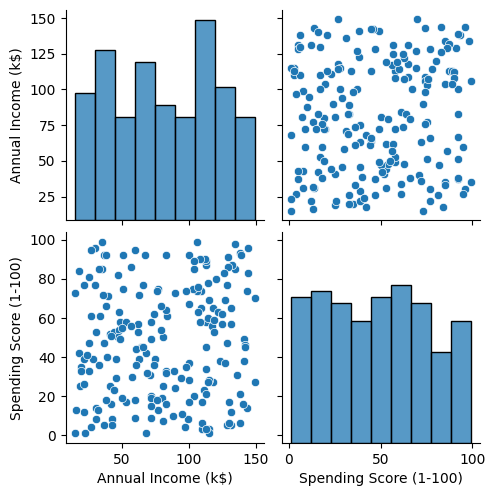

In [6]:
# Visualizing the data distribution
sns.pairplot(features)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

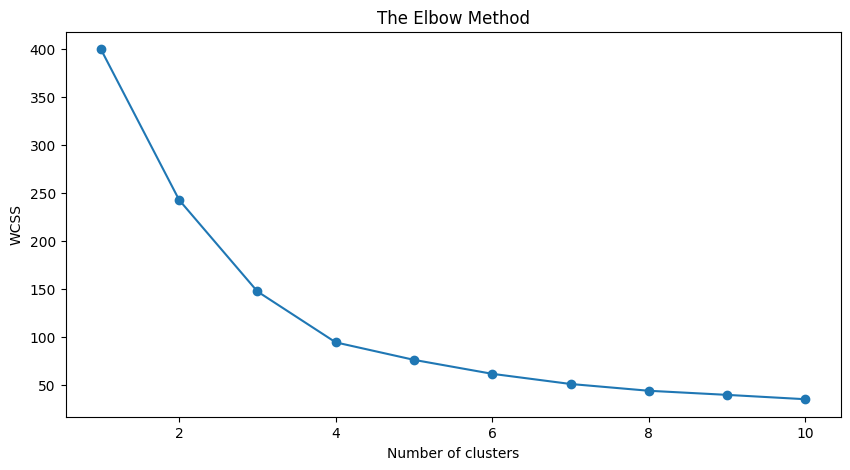

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# The Elbow Method to find the optimal number of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Assuming the optimal number of clusters is 5 (adjust based on the elbow plot)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
data['Cluster'] = clusters


   Annual Income (k$)  Spending Score (1-100)
0            1.019319                0.894145
1           -0.535340                0.034530
2           -0.971946                1.191551
3            0.763725               -1.006467
4           -1.091095               -0.997628


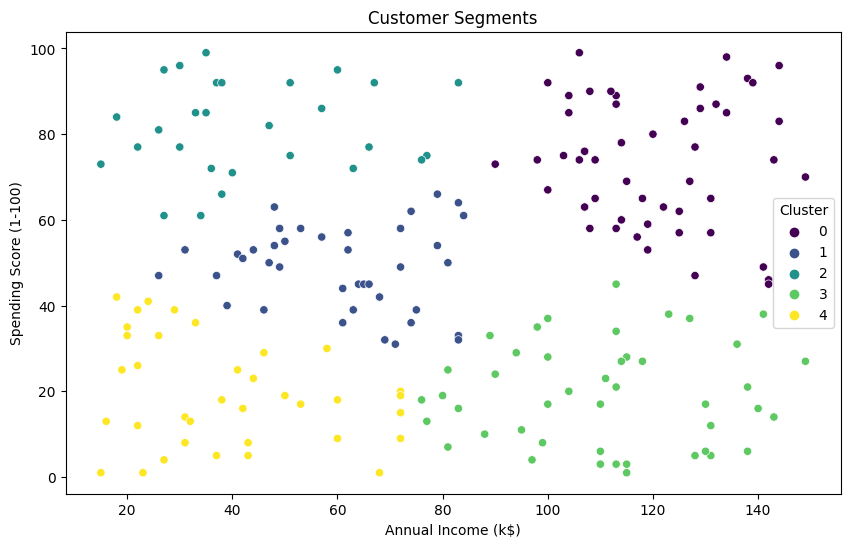

In [8]:
# Analyzing Clusters
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=features.columns)
print(cluster_centers)

# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.show()
